# Laboratorio 4

## Ejercicio 1

Simule el comportamiento de los enemigos en un videojuego simple usando métodos de Monte Carlo. Para ello
considere lo siguiente
1. Defina un conjunto de reglas para el comportamiento del enemigo, como patrones de movimiento y
decisiones de ataque.
2. Implemente una simulación de Monte Carlo que genere posibles resultados del comportamiento del
enemigo durante una serie de turnos.
3. Analice la distribución de los posibles resultados y determine la probabilidad de éxito o fracaso del jugador.
4. Ajuste las reglas y los parámetros para explorar diferentes estrategias y resultados de los jugadores.

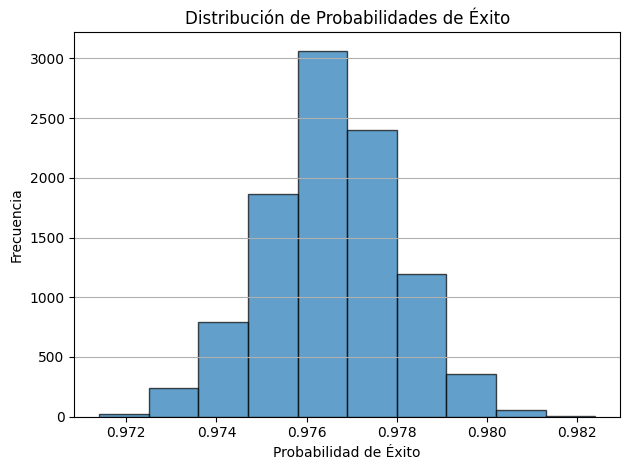

Probabilidad de éxito promedio: 97.66%


In [34]:
import random
import matplotlib.pyplot as plt

def movimiento_enemigo():
    possible_moves = ['arriba', 'abajo', 'izquierda', 'derecha']
    return random.choice(possible_moves)

def monte_carlo_simulation(turns, simulations):
    success_count = 0
    player_position = (0, 0)

    for _ in range(simulations):
        enemy_position = (2, 2)

        for _ in range(turns):
            movimiento = movimiento_enemigo()
            if movimiento == 'arriba':
                enemy_position = (enemy_position[0] - 1, enemy_position[1])

            elif movimiento == 'abajo':
                enemy_position = (enemy_position[0] + 1, enemy_position[1])

            elif movimiento == 'izquierda':
                enemy_position = (enemy_position[0], enemy_position[1] - 1)

            elif movimiento == 'derecha':
                enemy_position = (enemy_position[0], enemy_position[1] + 1)

            if enemy_position == player_position:
                success_count -= 1
                break

        success_count += 1

    
    probabilidad = success_count / simulations

    return probabilidad

turns = 5
simulations = 10000
probabilidades_de_exito = []
for i in range(simulations):
    probabilidades_de_exito.append(monte_carlo_simulation(turns, simulations))

# Visualización de la distribución de las probabilidades de éxito
plt.hist(probabilidades_de_exito, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribución de Probabilidades de Éxito")
plt.xlabel("Probabilidad de Éxito")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print('Probabilidad de éxito promedio: {:.2f}%'.format(sum(probabilidades_de_exito) / simulations * 100))




## Ejercicio 2
Estime el precio de una opción call europea utilizando la fórmula de Black-Scholes a través de la simulación Monte
Carlo. Para ello considere lo siguiente:
1. Implemente la fórmula de Black-Scholes para calcular el precio teórico de la opción.
2. Simule las trayectorias del precio de las acciones mediante el movimiento browniano geométrico.
3. Calcule el pago de cada camino y promedielos para estimar el precio de la opción.


In [11]:
import numpy as np
import scipy.stats as stats

# Black-Scholes Call Price Function
def black_scholes_call_price(S_t, X, r, T, sigma):
    d1 = (np.log(S_t / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S_t * stats.norm.cdf(d1) - X * np.exp(-r * T) * stats.norm.cdf(d2)
    return C

# Stock Path Simulation Function
def simulate_stock_path(S_t, r, sigma, T, n_steps):
    dt = T / n_steps
    prices = [S_t]
    for _ in range(n_steps):
        Z = np.random.normal(0, 1)
        S_next = prices[-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
        prices.append(S_next)
    return prices

# Monte Carlo Call Price Estimation Function
def monte_carlo_call_price(S_t, X, r, T, sigma, n_simulations, n_steps):
    payoffs = []
    for _ in range(n_simulations):
        path = simulate_stock_path(S_t, r, sigma, T, n_steps)
        payoff = max(0, path[-1] - X)  # Opción call europea
        payoffs.append(payoff)
    return np.exp(-r * T) * np.mean(payoffs)


S_t = 100
X = 100 
r = 0.05
T = 1 
sigma = 0.2
n_simulations = 10000
n_steps = 250

bs_price = black_scholes_call_price(S_t, X, r, T, sigma)
print(f"Black-Scholes Call Price: {bs_price:.2f}")

mc_price = monte_carlo_call_price(S_t, X, r, T, sigma, n_simulations, n_steps)
print(f"Monte Carlo Estimated Call Price: {mc_price:.2f}")


Black-Scholes Call Price: 10.45
Monte Carlo Estimated Call Price: 10.39


## Ejercicio 3
Estime la probabilidad y el impacto de una brecha de seguridad cibernética utilizando la simulación de Monte Carlo.
Para ello considere lo siguiente:
1. Defina las probabilidades de varios eventos de ataques cibernéticos (por ejemplo, phishing, malware).
2. Asigne valores de impacto potencial a cada evento (p. ej., pérdida de datos, impacto financiero).
3. Implemente una simulación de Monte Carlo para estimar el nivel de riesgo general.
4. Analice el impacto de diferentes probabilidades de ataques cibernéticos en el riesgo general.


In [19]:
import random

def simulate_attack(prob_phishing, prob_malware):
    loss = 0
    if random.random() < prob_phishing:
        loss += random.uniform(10000, 100000)
    if random.random() < prob_malware:
        loss += random.uniform(20000, 150000)
    return loss

def monte_carlo_simulation(n, prob_phishing, prob_malware):
    total_loss = 0
    for _ in range(n):
        total_loss += simulate_attack(prob_phishing, prob_malware)
    average_loss = total_loss / n
    return average_loss


In [33]:
n_simulations = 100000
average_loss = monte_carlo_simulation(n_simulations, 0.05, 0.03)
print(f"Pérdida promedio estimada: ${average_loss:.2f}")

Pérdida promedio estimada: $5253.17


## Ejercicio 4
Considere un campo de su interés y defina un problema donde se pueda resolver usando Monte Carlo. Para ello
considere decir lo siguiente
1. Defina correctamente el problema, dejando claro las suposiciones y datos
    - Un joven desea planificar un viaje mochilero de 10 días a través de Europa, visitando 3 ciudades diferentes. Tiene un presupuesto limitado y desea maximizar su experiencia.
    Es necesario tomar en cuenta las siguientes variables:
        - Transporte
        - Alojamiento
        - Comida
        - Actividades
2. Defina como Monte Carlo puede ayudarle a solucionar dicho problema
    - Monte Carlo puede ayudar tomando diferentes decisiones aleatorias y sumando a los costos para poder decidir cuales opciones estan dentro del presupuesto y ofrecen las mejores experiencias. 
3. Escriba un script en su lenguaje de programación favorito solucionando el problema
4. Analice correctamente los resultados, extrayendo cualquier insight que considere valioso

In [80]:
import numpy as np
def simular_viaje():
    costo_total = 0
    for _ in range(10):
        transporte = np.random.choice([50, 80, 120])
        alojamiento = np.random.choice([30, 50, 80])
        comida = np.random.choice([10, 20, 30])
        actividades = np.random.choice([5, 15, 25]) * 10  

        costo = transporte + alojamiento + comida + actividades
        costo_total += costo
    return costo_total

In [88]:
def monte_carlo_viaje(presupuesto, n_simulaciones):
    viajes_exitosos = 0
    for _ in range(n_simulaciones):
        costo_total = simular_viaje()
        if costo_total <= presupuesto:
            viajes_exitosos += 1
    
    probabilidad = viajes_exitosos / n_simulaciones
    return probabilidad * 100

In [89]:
probabilidad_exito = monte_carlo_viaje(3500, 10000)
print(f"Probabilidad de éxito: {probabilidad_exito:.2f} %")

Probabilidad de éxito: 94.19 %


En esta simulacion podemos ver que a medida que se aumente el presupuesto la probabilidad de tener un viaje exitoso, es decir, dentro del presupuesto, aumenta